# 날씨 변수에 따른 음주운전사고 예측을 위한 머신러닝


In [1]:
import pandas as pd

## 1. 데이터 불러오기

In [2]:
data = pd.read_csv('aws_acci_seoul_2017.csv')

In [3]:
data.head(3)

,지점일시,지점,일시,8h_celsius,8h_windD,8h_windV,8h_precipitaiton,8h_spotAtoPressure,8h_seaAtoPressure,8h_humidity,8h_insolation,8h_sunshine,사고번호,발생요일,발생시군구,사고내용,음주사고발생
0,4.002017e+12,400,2017010100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,False
1,4.002017e+12,400,2017010101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,False
2,4.002017e+12,400,2017010102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,False


In [4]:
data['음주사고발생'] = data['음주사고발생'].astype('int')

In [5]:
data = data.sort_values(by='음주사고발생',  ascending=False)

print(len(data[data['음주사고발생'] == 1]))
print(data.shape)

data1 = data[:6000]

2825
(244988, 17)


In [6]:
data2 = data[6000:12000]

data2.head()

,지점일시,지점,일시,8h_celsius,8h_windD,8h_windV,8h_precipitaiton,8h_spotAtoPressure,8h_seaAtoPressure,8h_humidity,8h_insolation,8h_sunshine,사고번호,발생요일,발생시군구,사고내용,음주사고발생
167016,4.192017e+12,419,2017020515,0.8625,210.3000,1.5375,0.0625,NaN,NaN,0.0000,0.0,0.0,NaN,NaN,NaN,NaN,0
165848,4.182017e+12,418,2017121900,2.1375,282.7000,2.3750,0.0000,NaN,NaN,75.8875,NaN,NaN,NaN,NaN,NaN,NaN,0
165849,4.182017e+12,418,2017121901,1.8250,302.7375,2.4625,0.0000,NaN,NaN,73.4750,NaN,NaN,NaN,NaN,NaN,NaN,0
165850,4.182017e+12,418,2017121902,1.4000,324.1250,2.4500,0.0000,NaN,NaN,71.1875,NaN,NaN,NaN,NaN,NaN,NaN,0
165851,4.182017e+12,418,2017121903,0.6000,332.3500,2.5000,0.0000,NaN,NaN,71.8250,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
data1.columns

Index(['지점일시', '지점', '일시', '8h_celsius', '8h_windD', '8h_windV',
       '8h_precipitaiton', '8h_spotAtoPressure', '8h_seaAtoPressure',
       '8h_humidity', '8h_insolation', '8h_sunshine', '사고번호', '발생요일', '발생시군구',
       '사고내용', '음주사고발생'],
      dtype='object')

In [8]:
data1 = data1.loc[:,['지점일시', '지점', '일시', '8h_celsius', '8h_windD', '8h_windV', '8h_precipitaiton', '8h_humidity', '음주사고발생']]
data1.head(10)

,지점일시,지점,일시,8h_celsius,8h_windD,8h_windV,8h_precipitaiton,8h_humidity,음주사고발생
244987,NaN,411,2017112602,NaN,NaN,NaN,NaN,NaN,1
187811,4.222017e+12,422,2017062203,18.8875,313.7000,2.1750,0.000,89.5125,1
74550,4.082017e+12,408,2017070908,25.2375,128.9125,0.5125,0.625,92.1125,1
135740,4.152017e+12,415,2017070706,25.8125,149.6750,0.8500,0.000,NaN,1
4558,4.002017e+12,400,2017070911,26.1125,62.9000,0.5500,0.125,92.0250,1
225273,5.092017e+12,509,2017093021,19.9125,151.7250,0.8750,0.000,NaN,1
4546,4.002017e+12,400,2017070823,27.6375,245.1625,1.7875,0.000,81.8500,1
96318,4.112017e+12,411,2017010205,5.3875,110.7625,1.8750,0.000,68.9375,1
13046,4.012017e+12,401,2017062712,24.7625,141.5750,1.4125,0.000,NaN,1
34000,4.032017e+12,403,2017111901,-2.3750,305.7000,3.3625,0.000,NaN,1


In [9]:
data2 = data2.loc[:,['지점일시', '지점', '일시', '8h_celsius', '8h_windD', '8h_windV', '8h_precipitaiton', '8h_humidity', '음주사고발생']]
data2.head(10)

,지점일시,지점,일시,8h_celsius,8h_windD,8h_windV,8h_precipitaiton,8h_humidity,음주사고발생
167016,4.192017e+12,419,2017020515,0.8625,210.3000,1.5375,0.0625,0.0000,0
165848,4.182017e+12,418,2017121900,2.1375,282.7000,2.3750,0.0000,75.8875,0
165849,4.182017e+12,418,2017121901,1.8250,302.7375,2.4625,0.0000,73.4750,0
165850,4.182017e+12,418,2017121902,1.4000,324.1250,2.4500,0.0000,71.1875,0
165851,4.182017e+12,418,2017121903,0.6000,332.3500,2.5000,0.0000,71.8250,0
165852,4.182017e+12,418,2017121904,-0.2625,332.6125,2.5125,0.0000,71.8000,0
165854,4.182017e+12,418,2017121906,-1.6000,334.6750,2.6250,0.0000,69.6375,0
165844,4.182017e+12,418,2017121820,2.0125,204.0250,1.7250,0.0000,80.8000,0
167015,4.192017e+12,419,2017020514,0.9625,184.4375,1.3625,0.0625,0.0000,0
165855,4.182017e+12,418,2017121907,-2.1125,336.0750,2.8375,0.0000,66.3625,0


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 244987 to 165847
Data columns (total 9 columns):
지점일시                5997 non-null float64
지점                  6000 non-null int64
일시                  6000 non-null int64
8h_celsius          5996 non-null float64
8h_windD            5997 non-null float64
8h_windV            5997 non-null float64
8h_precipitaiton    5991 non-null float64
8h_humidity         5147 non-null float64
음주사고발생              6000 non-null int64
dtypes: float64(6), int64(3)
memory usage: 468.8 KB


In [11]:
tmp = ['8h_celsius', '8h_windD', '8h_windV', '8h_precipitaiton', '8h_humidity']
# nan값을 0으로 대체
for i in tmp:
    data1[i] = data1[i].fillna(0)
    data2[i] = data2[i].fillna(0)

In [12]:
data2.isnull().sum()

지점일시                0
지점                  0
일시                  0
8h_celsius          0
8h_windD            0
8h_windV            0
8h_precipitaiton    0
8h_humidity         0
음주사고발생              0
dtype: int64

In [13]:
data1[data1['지점일시'].isnull()]

,지점일시,지점,일시,8h_celsius,8h_windD,8h_windV,8h_precipitaiton,8h_humidity,음주사고발생
244987,NaN,411,2017112602,0.0,0.0,0.0,0.0,0.0,1
244986,NaN,402,2017082402,0.0,0.0,0.0,0.0,0.0,1
244985,NaN,402,2017081203,0.0,0.0,0.0,0.0,0.0,1


In [14]:
data1 = data1[7:-3][:]
data2 = data2[7:-3][:]

In [15]:
data1.head()

,지점일시,지점,일시,8h_celsius,8h_windD,8h_windV,8h_precipitaiton,8h_humidity,음주사고발생
96318,4.112017e+12,411,2017010205,5.3875,110.7625,1.8750,0.0,68.9375,1
13046,4.012017e+12,401,2017062712,24.7625,141.5750,1.4125,0.0,0.0000,1
34000,4.032017e+12,403,2017111901,-2.3750,305.7000,3.3625,0.0,0.0000,1
58335,4.062017e+12,406,2017090120,26.2875,245.4125,1.1500,0.0,50.3500,1
110908,4.122017e+12,412,2017090419,26.4375,147.9375,1.3375,0.0,0.0000,1


In [16]:
data1.to_csv('aws_acci_data.csv',index=True)

In [17]:
data2.head()

,지점일시,지점,일시,8h_celsius,8h_windD,8h_windV,8h_precipitaiton,8h_humidity,음주사고발생
165844,4.182017e+12,418,2017121820,2.0125,204.0250,1.7250,0.0000,80.8000,0
167015,4.192017e+12,419,2017020514,0.9625,184.4375,1.3625,0.0625,0.0000,0
165855,4.182017e+12,418,2017121907,-2.1125,336.0750,2.8375,0.0000,66.3625,0
165856,4.182017e+12,418,2017121908,-2.6125,338.2125,3.0000,0.0000,64.8125,0
165857,4.182017e+12,418,2017121909,-3.0000,339.9625,3.2625,0.0000,63.2500,0


In [18]:
data1.shape

(5990, 9)

In [19]:
data2.shape

(5990, 9)

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5990 entries, 96318 to 165845
Data columns (total 9 columns):
지점일시                5988 non-null float64
지점                  5990 non-null int64
일시                  5990 non-null int64
8h_celsius          5990 non-null float64
8h_windD            5990 non-null float64
8h_windV            5990 non-null float64
8h_precipitaiton    5990 non-null float64
8h_humidity         5990 non-null float64
음주사고발생              5990 non-null int64
dtypes: float64(6), int64(3)
memory usage: 468.0 KB


In [21]:
# 음주사고발생 False = 0, True = 1로 바꾸어준다
#data['음주사고발생'] = data['음주사고발생'].astype('str') 

#for 구문은 너무 오래걸린다... 5분이나 계속돼서 끔.

#true_index = data[data['음주사고발생'] == True].index
#false_index =  data[data['음주사고발생'] == False].index

#for i in true_index:
#    data['음주사고발생'][i] = 1
#for i in false_index:
#    data['음주사고발생'][i] = 0

In [22]:
#data['음주사고여부'] = data['음주사고발생'].replace('True',1).replace('False',0)

In [23]:
#data[15:30]

In [24]:
print(data1.columns)
print(data1.shape)
print(data2.shape)

Index(['지점일시', '지점', '일시', '8h_celsius', '8h_windD', '8h_windV',
       '8h_precipitaiton', '8h_humidity', '음주사고발생'],
      dtype='object')
(5990, 9)
(5990, 9)


In [25]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split

# x는 독립변수, y는 종속변수

X_train = data1[['8h_celsius', '8h_windD', '8h_windV', '8h_precipitaiton', '8h_humidity']]

y_train = data1[['음주사고발생']]

X_test=data2[['8h_celsius', '8h_windD', '8h_windV', '8h_precipitaiton', '8h_humidity']]
y_test = data2[['음주사고발생']]
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
# train과 test set으로 분리
#train_test_split()는 원래 트레이닝 데이터와 결과값을 무작위로 섞은후 test_size로 주어진 비율만큼 각각 나눈다.

#X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.5)

#print('X_train = ', X_train.shape)
#print('X_test = ', X_test.shape)
#print('y_train = ', y_train.shape)
#print('y_test = ', y_test.shape)

(5990, 5)
(5990, 1)
(5990, 1)


/root/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
# 모두다 범주형이기 때문에 category로 type을 변경하기.

y_train[:] = y_train[:].astype('category')
y_test[:] = y_test[:].astype('category')

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/root/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(key, value)
/root/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [27]:
#X_test.head()

In [28]:
X_train.head()

,8h_celsius,8h_windD,8h_windV,8h_precipitaiton,8h_humidity
96318,5.3875,110.7625,1.8750,0.0,68.9375
13046,24.7625,141.5750,1.4125,0.0,0.0000
34000,-2.3750,305.7000,3.3625,0.0,0.0000
58335,26.2875,245.4125,1.1500,0.0,50.3500
110908,26.4375,147.9375,1.3375,0.0,0.0000


## (1) 퍼셉트론을 이용한 머신러닝 - 47% 예측력

In [29]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

sc = StandardScaler() #표준화 함수를 sc 변수에다가 넣기.
sc.fit(X_train) #X_train의 평균과 표준편차를 구함
X_train_std = sc.transform(X_train) #트레이닝 데이터를 표준화
X_test_std = sc.transform(X_test) #테스트 데이터를 표준화

#머신러닝
#사이킷런의 linear-model에 선형모델 알고리즘 사용
#learning rate를 0.01로두고 퍼셉트론 객체를 생성.
ml = Perceptron(eta0=0.1, n_iter=40, random_state=0) 
ml.fit(X_train_std, y_train)

#예측확인
#테스트 셋에 있는 독립변수들을 이용해 종속변수 예측하기 
y_pred = ml.predict(X_test_std)

#test의 종속변수의 값은 모두다 0이기 때문에 y_pred=0인 것이 정답!
yes = np.sum(y_pred==0)
nope = np.sum(y_pred==1)
print(yes)
print(nope)
print('퍼셉트론 모델 사용하여 예측 맞은 값은요..? ' , yes/nope) #47프로 맞췄음..ㅋㅋ

print('정확도 : %.2f' %accuracy_score(y_test, y_pred))

/root/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/root/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'np' is not defined

## (2) 선형회귀모델링 - 67% 예측력
- rmsle라는 예측력을 검사하는 함수를 만듦.
- exp란 소프트맥스 함수로 계산되어 predicted_values와 actual_values로 나타낸다.
- 소트맥스는 모든 값은 0~1사이의 값이며 출력 총합이 1이된다.
- rmsle score가 과대평가 된 항목보다는 과소평가된 항목에 페널티를 준 것.
- 오차를 제곱해서 평균한 값의 제곱근으로 값이 작을수록 정밀도가 높게 됨.

In [30]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp: 
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)

    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)

    # 평균을 낸다.
    mean_difference = difference.mean()

    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)

    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
import numpy as np
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 선형회귀 모델을 초기화
lModel = LinearRegression()

# 모델을 학습시킨다.
y_train_log = np.log1p(y_train)
lModel.fit(X_train, y_train_log)

# 예측하고 정확도를 평가한다.
preds = lModel.predict(X_test)
print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_test),np.exp(preds), False))

print(preds[0:10])
print(len(preds))
aboutzero = np.sum(preds<0.5)
aboutone = np.sum(preds>0.5)
print('0과 가까운 값', aboutzero) #총 5990개 중 4515개가 0과 더 가까움 
print('1과 가까운 값', aboutone)

print('예측력은... ? ', 1-(aboutone/aboutzero)) #67프로 예측력
#약 20프로의 오차율을 보임

RMSLE Value For Linear Regression:  0.23997799693125818
[[0.38332866]
 [0.56182241]
 [0.31413842]
 [0.30523075]
 [0.28652047]
 [0.26802157]
 [0.24936803]
 [0.57361261]
 [0.24051231]
 [0.23000578]]
5990
0과 가까운 값 4515
1과 가까운 값 1475
예측력은... ?  0.6733111849390919


## (3) RandomForest 모델링 - 23% 예측력

### 랜덤 포레스트의 장점 중 하나는 각 독립 변수의 중요도(feature importance) 계산!

In [32]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 모델 
#rf_model1이라는 랜덤포레스트 객체 생성
#n_estimators=100개는 의사결정트리수가 100개임.
#n_jobs는 학습을 수행하기 위해 CPU 코어 2개를 병렬적으로 활용하여 성능을 높이기

rf_model1 = RandomForestClassifier(n_estimators=100, 
                                   n_jobs=2,
                                   oob_score=True,
                                   random_state=123456)

rf_model1.fit(X_train, y_train) #랜덤포레스트 객체 학습
print('랜덤포레스트 모델1 :', rf_model1.fit(X_train, y_train))



/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


랜덤포레스트 모델1 : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)


In [33]:
from sklearn.metrics import accuracy_score

predicted1 = rf_model1.predict(X_test)#추출한 테스트 데이터 기반으로 예측
accuracy1 = accuracy_score(y_test, predicted1)
cl_report = metrics.classification_report(predicted1, y_test)


print(f'rf 1 = Out-of-bag score estimate: {rf_model1.oob_score_:.3}')
print(f'rf 1 = Mean accuracy score: {accuracy1:.3}')
print('report', cl_report)

print(np.sum(predicted1==0)) #총 5990개 중 1419개 맞음. 예측력 23프로

rf 1 = Out-of-bag score estimate: 0.872
rf 1 = Mean accuracy score: 0.237
report              precision    recall  f1-score   support

          0       0.24      1.00      0.38      1419
          1       0.00      0.00      0.00      4571

avg / total       0.06      0.24      0.09      5990

1419


/root/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
predicted1

array([1, 1, 1, ..., 1, 1, 1])

Feature ranking:
1. feature 0 (0.310764)
2. feature 4 (0.259386)
3. feature 1 (0.227922)
4. feature 2 (0.174663)
5. feature 3 (0.027265)


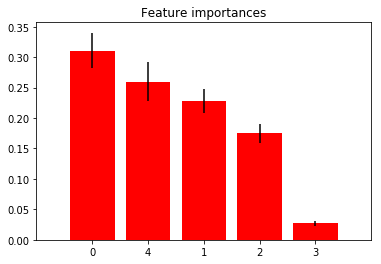

In [37]:
importances = rf_model1.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_model1.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

import matplotlib.pyplot as plt
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#사고는 0인 온도, 